In [ ]:
!pip install six  # To handle strings as file-like objects, you can achieve similar functionality using Python's built-in io module:

In [ ]:
# Importing all necessary libraries

import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
from numpy import median
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pylab import rcParams
import matplotlib
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus# Export as dot file
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Preprocessing

In [ ]:
# Loading data with converting Date into datetime/release date

def load_tmdb_movies(path):
    file = pd.read_csv(path)
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test = load_tmdb_movies("https://raw.githubusercontent.com/zach-hb/Predicting-Blockbusters/main/Resources/tmdb_5000_movies.csv")
test.head()

budget                                             genres  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{'id': 1463, 'name': 'culture clash'}, {'id':...                en   
1  [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...                en   
2  [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...                en   
3  [{'id': 849, 'name': 'dc comics'}, {'id': 853,...                en   
4  [{'id': 818, 'name': 'based on novel'}, {'id':...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2009-12-10  2787965087   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2007-05-19   961000000   
2  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2015-10-26   880674609   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-07-16  1084939099   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1    169.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2    148.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
3    165.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [ ]:
# Loading Credit.csv

def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test_credits = load_tmdb_credits("https://raw.githubusercontent.com/zach-hb/Predicting-Blockbusters/main/Resources/tmdb_5000_credits.csv")
test_credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{'cast_id': 242, 'character': 'Jake Sully', '...   
1  [{'cast_id': 4, 'character': 'Captain Jack Spa...   
2  [{'cast_id': 1, 'character': 'James Bond', 'cr...   
3  [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
4  [{'cast_id': 5, 'character': 'John Carter', 'c...   

                                                crew  
0  [{'credit_id': '52fe48009251416c750aca23', 'de...  
1  [{'credit_id': '52fe4232c3a36847f800b579', 'de...  
2  [{'credit_id': '54805967c3a36829b5002c41', 'de...  
3  [{'credit_id': '52fe4781c3a36847f81398c3', 'de...  
4  [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...

In [ ]:
#LOAD CSV's
movies = load_tmdb_movies("https://raw.githubusercontent.com/zach-hb/Predicting-Blockbusters/main/Resources/tmdb_5000_movies.csv")
credits = load_tmdb_credits("https://raw.githubusercontent.com/zach-hb/Predicting-Blockbusters/main/Resources/tmdb_5000_credits.csv")


In [ ]:
# THESE FUNCTIONS ARE IF WE NEED EXTRA FIELDS LATER from imdb ofc taken from https://www.kaggle.com/tanetboss/beginner-binary-classification-for-nice-movie/notebook#Ok-let-check-the-feature-importance
#GOAL to predict if a movie is nice before it releases
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version.
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    tmdb_movies['title_month'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.month)

    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [ ]:
# New simplified dataframe
pretreated_data = convert_to_original_format(movies, credits)
pretreated_data.head()

<ipython-input-86-483735e14c36>:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan
<ipython-input-86-483735e14c36>:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan
<ipython-input-86-483735e14c36>:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan
<ipython-input-86-483735e14c36>:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan
<ipython-input-86-483735e14c36>:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan
<ipython-input-86-483735e14c36>:43: FutureWarning: The 

budget                                    genres  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   
1  300000000                  Adventure|Fantasy|Action   
2  245000000                    Action|Adventure|Crime   
3  250000000               Action|Crime|Drama|Thriller   
4  260000000          Action|Adventure|Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                       plot_keywords  language  \
0  culture clash|future|space war|space colony|so...   English   
1  ocean|drug abuse|exotic island|east india trad...   English   
2  spy|based on novel|secret agent|sequel|mi6|bri...  Français   
3  dc comics|crime fighter|terrorist|secret ident...   English   
4  based on novel|mars|medallion|space travel|pri...   English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... title_year  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...  ...     2009.0   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  ...     2007.0   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...     2015.0   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...  ...     2012.0   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...     2012.0   

  title_month                   country      director_name     actor_1_name  \
0        12.0  United States of America      James Cameron  Sam Worthington   
1         5.0  United States of America     Gore Verbinski      Johnny Depp   
2        10.0            United Kingdom         Sam Mendes     Daniel Craig   
3         7.0  United States of America  Christopher Nolan   Christian Bale   
4         3.0  United States of America     Andrew Stanton    Taylor Kitsch   

      actor_2_name      actor_3_name              companies_1  \
0      Zoe Saldana  Sigourney Weaver  Ingenious Film Partners   
1    Orlando Bloom   Keira Knightley     Walt Disney Pictures   
2  Christoph Waltz       Léa Seydoux        Columbia Pictures   
3    Michael Caine       Gary Oldman       Legendary Pictures   
4     Lynn Collins   Samantha Morton     Walt Disney Pictures   

                              companies_2              companies_3  
0  Twentieth Century Fox Film Corporation       Dune Entertainment  
1                 Jerry Bruckheimer Films  Second Mate Productions  
2                                  Danjaq                      B24  
3                            Warner Bros.         DC Entertainment  
4                                     NaN                      NaN  

[5 rows x 30 columns]

<ipython-input-88-bba35e0cd8d9>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(pretreated_data[list(pretreated_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)


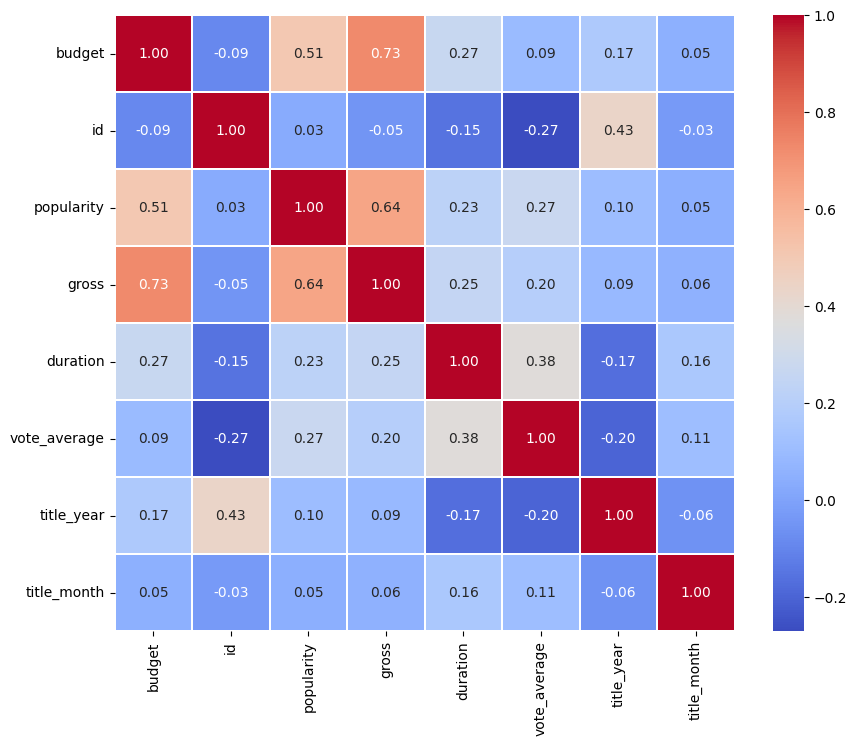

In [ ]:
#Cleaning/dropping irrelevant features 2

pretreated_data.drop(['num_voted_users'], axis=1, inplace=True)
pretreated_data.drop(['homepage'], axis=1, inplace=True)
#correlation matrix with numerical values
plt.figure(figsize = (10,8))
g = sns.heatmap(pretreated_data[list(pretreated_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 1000x800 with 0 Axes>

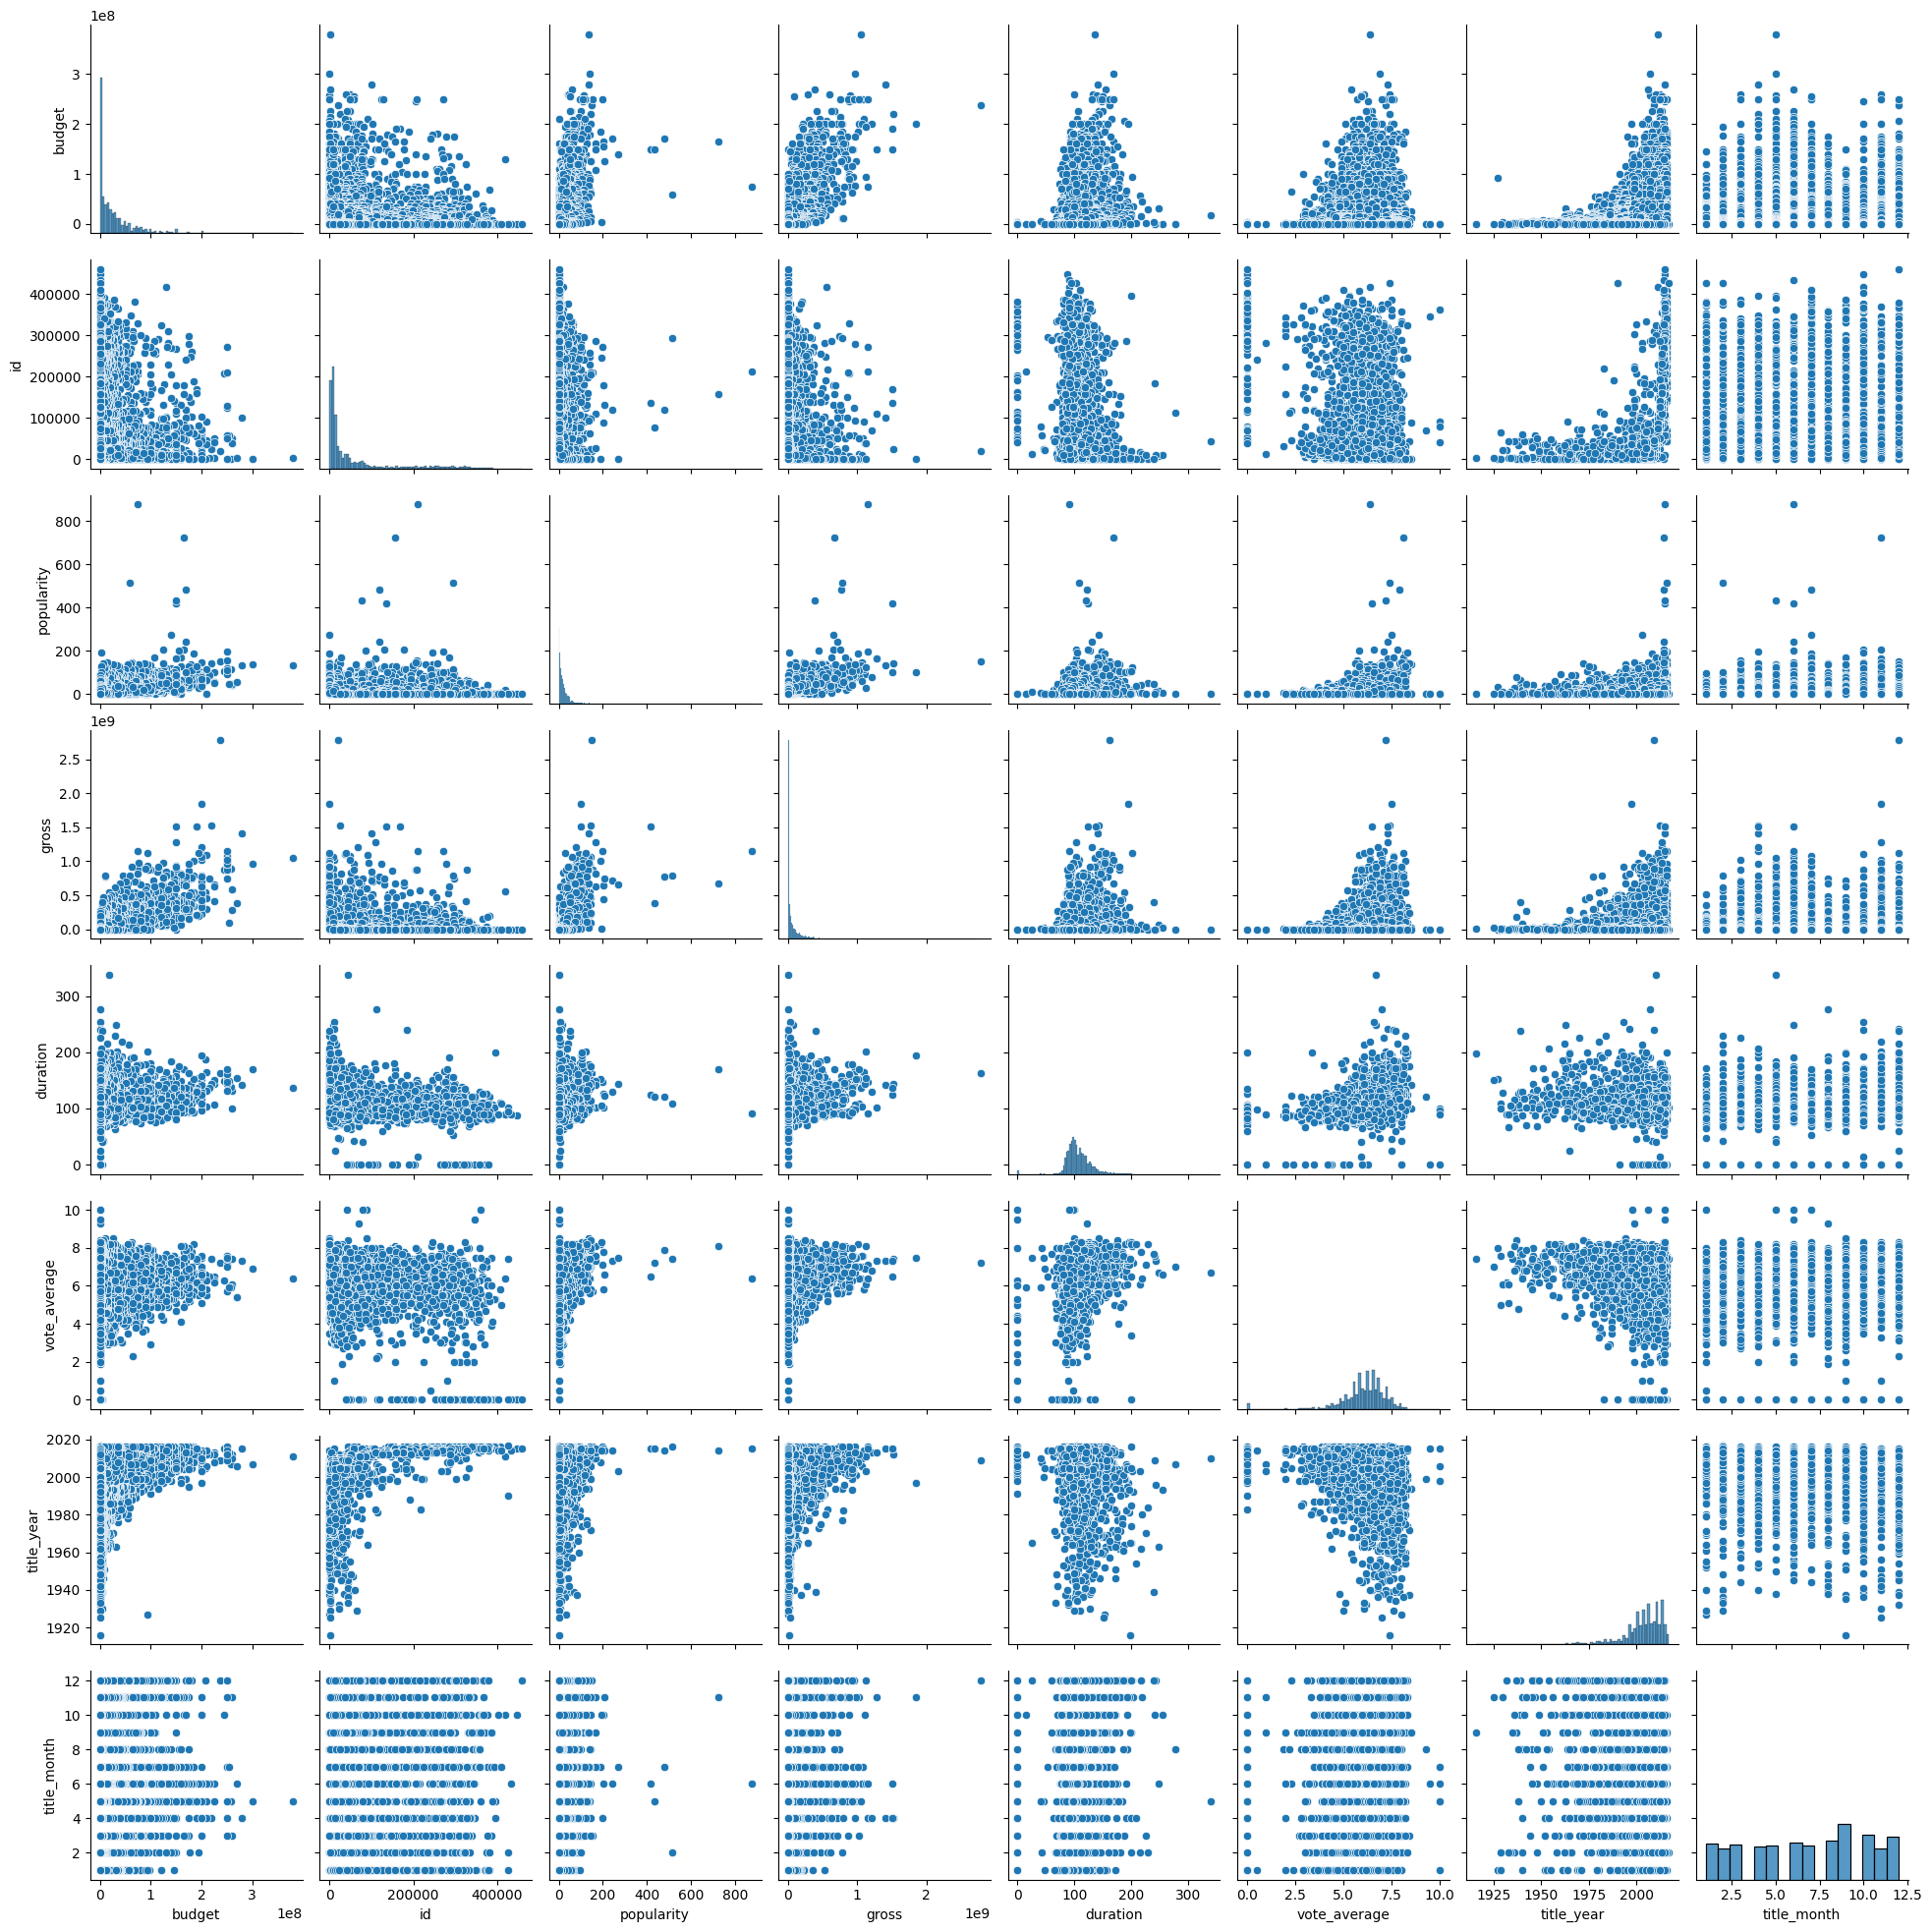

In [ ]:
# pair plot to visualize data
plt.figure(figsize = (10,8))
g = sns.pairplot(pretreated_data,palette="bright")

In [ ]:
#title year and vote average + duration cleaup
pretreated_data = pretreated_data[pretreated_data['vote_average'] != 0]
pretreated_data = pretreated_data[pretreated_data['duration'] != 0]
pretreated_data.columns
data= pretreated_data.copy()

## Converting appropriate fields to classification 1 & 0

In [ ]:
# Budget
#convert budget into 1's and 0's for budget:
import statistics
sd = statistics.stdev(data.budget)
mean = data.budget.mean()
max = data.budget.max()
min = data.budget.min()

#these are hard coded amount of fields and values we can change this accordingly
#these are def arbitrarly set into
data['Indie'] = data['budget'].map(lambda s: 1 if s < 5000000 else 0)
data['Low Budget'] = data['budget'].map(lambda s: 1 if 5000000 <= s < mean-sd else 0)
data['Average'] = data['budget'].map(lambda s: 1 if  mean-sd <= s < mean+sd  else 0)
data['High Budget'] = data['budget'].map(lambda s: 1 if mean+sd <= s < 150000000 else 0)
data['Very High Budget'] = data['budget'].map(lambda s: 1 if s >= 150000000 else 0)

In [ ]:
data.head()

budget                                    genres      id  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   19995   
1  300000000                  Adventure|Fantasy|Action     285   
2  245000000                    Action|Adventure|Crime  206647   
3  250000000               Action|Crime|Drama|Thriller   49026   
4  260000000          Action|Adventure|Science Fiction   49529   

                                       plot_keywords  language  \
0  culture clash|future|space war|space colony|so...   English   
1  ocean|drug abuse|exotic island|east india trad...   English   
2  spy|based on novel|secret agent|sequel|mi6|bri...  Français   
3  dc comics|crime fighter|terrorist|secret ident...   English   
4  based on novel|mars|medallion|space travel|pri...   English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  ...     actor_2_name  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...  ...      Zoe Saldana   
1  [{'iso_3166_1': 'US', 'name': 'United States o...  ...    Orlando Bloom   
2  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...  ...  Christoph Waltz   
3  [{'iso_3166_1': 'US', 'name': 'United States o...  ...    Michael Caine   
4  [{'iso_3166_1': 'US', 'name': 'United States o...  ...     Lynn Collins   

       actor_3_name              companies_1  \
0  Sigourney Weaver  Ingenious Film Partners   
1   Keira Knightley     Walt Disney Pictures   
2       Léa Seydoux        Columbia Pictures   
3       Gary Oldman       Legendary Pictures   
4   Samantha Morton     Walt Disney Pictures   

                              companies_2              companies_3 Indie  \
0  Twentieth Century Fox Film Corporation       Dune Entertainment     0   
1                 Jerry Bruckheimer Films  Second Mate Productions     0   
2                                  Danjaq                      B24     0   
3                            Warner Bros.         DC Entertainment     0   
4                                     NaN                      NaN     0   

  Low Budget  Average  High Budget  Very High Budget  
0          0        0            0                 1  
1          0        0            0                 1  
2          0        0            0                 1  
3          0        0            0                 1  
4          0        0            0                 1  

[5 rows x 33 columns]

In [ ]:
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Indie', 'Low Budget', 'Average', 'High Budget',
       'Very High Budget'],
      dtype='object')

In [ ]:
# Months into Season
#convert month to season
data['Spring'] = data['title_month'].map(lambda s: 1 if 1 <= s <= 4 else 0)
data['Summer'] = data['title_month'].map(lambda s: 1 if 5 <= s <= 7 else 0)
data['Fall'] = data['title_month'].map(lambda s: 1 if 8 <= s <= 9 else 0)
data['Winter'] = data['title_month'].map(lambda s: 1 if 10 <= s <= 12 else 0)

In [ ]:
# Runtime into duration bins
#duration
data = data[np.isfinite(data['duration'])]
data['Short'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
data['Medium'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
data['Long'] = data['duration'].map(lambda s: 1 if 120 <= s < 150  else 0)
data['Very Long'] = data['duration'].map(lambda s: 1 if s >= 150  else 0)
data.columns

<ipython-input-95-37101939e135>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
<ipython-input-95-37101939e135>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Medium'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
<ipython-input-95-37101939e135>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Indie', 'Low Budget', 'Average', 'High Budget',
       'Very High Budget', 'Spring', 'Summer', 'Fall', 'Winter', 'Short',
       'Medium', 'Long', 'Very Long'],
      dtype='object')

In [ ]:
#genre
# impact on cross-validation scores:
# popularity success -> +3
# vote success -> +2.5-3
# commercial success -> -4.5-5
data['genres'].head()
genresUnflattened = list(map(lambda x: x.split('|'), data['genres']))
genres = set([item for subl in genresUnflattened for item in subl])
genres.remove('')
for genre in genres:
    data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
# data1.head()
data.columns

<ipython-input-96-7873b7420612>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
<ipython-input-96-7873b7420612>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
<ipython-input-96-7873b7420612>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Indie', 'Low Budget', 'Average', 'High Budget',
       'Very High Budget', 'Spring', 'Summer', 'Fall', 'Winter', 'Short',
       'Medium', 'Long', 'Very Long', 'Western', 'Fantasy', 'Documentary',
       'Crime', 'Science Fiction', 'Mystery', 'History', 'Adventure', 'Family',
       'Music', 'Romance', 'Comedy', 'Foreign', 'War', 'Thriller', 'TV Movie',
       'Horror', 'Drama', 'Animation', 'Action'],
      dtype='object')

## Defining Measurement of Success

In [ ]:
#Actually these are the 3 success in a nutshell
popularity_data = data.copy()
popularity_data['Popularity Success'] = popularity_data['popularity'].map(lambda s :1  if s >= popularity_data['popularity'].mean() else 0)
popularity_data['Vote Success'] = popularity_data['vote_average'].map(lambda s :1  if s >= popularity_data['vote_average'].mean() else 0)
popularity_data['Commercial Success'] = popularity_data['gross'] > popularity_data['budget']
popularity_data['Commercial Success'] = popularity_data['Commercial Success'].astype(int)


#metrics for true success
# svm accuracy scores: conditionAll ~= 79% > condition1orMore ~= 75% > condition2orMore ~= 55%
condition2orMore = (((popularity_data['Popularity Success'] == 1) & (popularity_data['Vote Success'] == 1)) |
             ((popularity_data['Popularity Success'] == 1) & (popularity_data['Commercial Success'] == 1)) |
             ((popularity_data['Commercial Success'] == 1) & (popularity_data['Vote Success'] == 1)))

condition1orMore = ((popularity_data['Popularity Success'] == 1) |
                 (popularity_data['Vote Success'] == 1) |
                 (popularity_data['Commercial Success'] == 1))

conditionAll = ((popularity_data['Popularity Success'] == 1) &
                 (popularity_data['Vote Success'] == 1) &
                 (popularity_data['Commercial Success'] == 1))

popularity_data['True Success'] = np.where(conditionAll, 1, 0)


In [ ]:
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Indie', 'Low Budget', 'Average', 'High Budget',
       'Very High Budget', 'Spring', 'Summer', 'Fall', 'Winter', 'Short',
       'Medium', 'Long', 'Very Long', 'Western', 'Fantasy', 'Documentary',
       'Crime', 'Science Fiction', 'Mystery', 'History', 'Adventure', 'Family',
       'Music', 'Romance', 'Comedy', 'Foreign', 'War', 'Thriller', 'TV Movie',
       'Horror', 'Drama', 'Animation', 'Action', 'Popularity Success',
       'Vote Success', 'Commercial Success', 'True Success'],
      dtype='object')

## Visualization on features x success before droping all irrelevant fields

<ipython-input-99-8785017b88da>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
<ipython-input-99-8785017b88da>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)


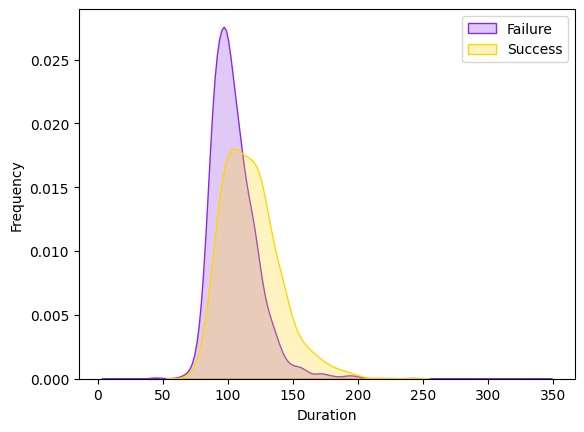

In [ ]:
# duration
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Duration")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

<ipython-input-100-a6b045d6ecba>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
<ipython-input-100-a6b045d6ecba>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)


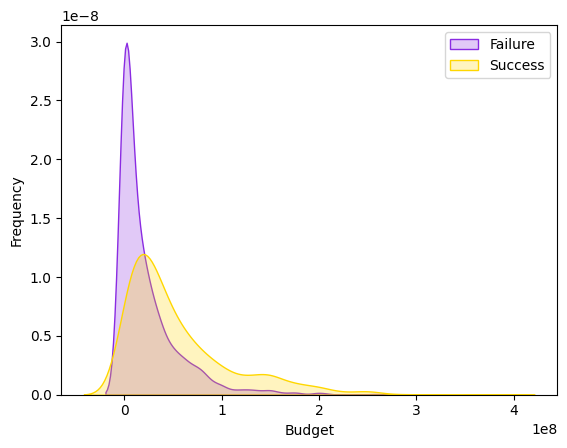

In [ ]:
# budget
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Budget")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

<ipython-input-101-bc4d6d32596c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(popularity_data[list(popularity_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)


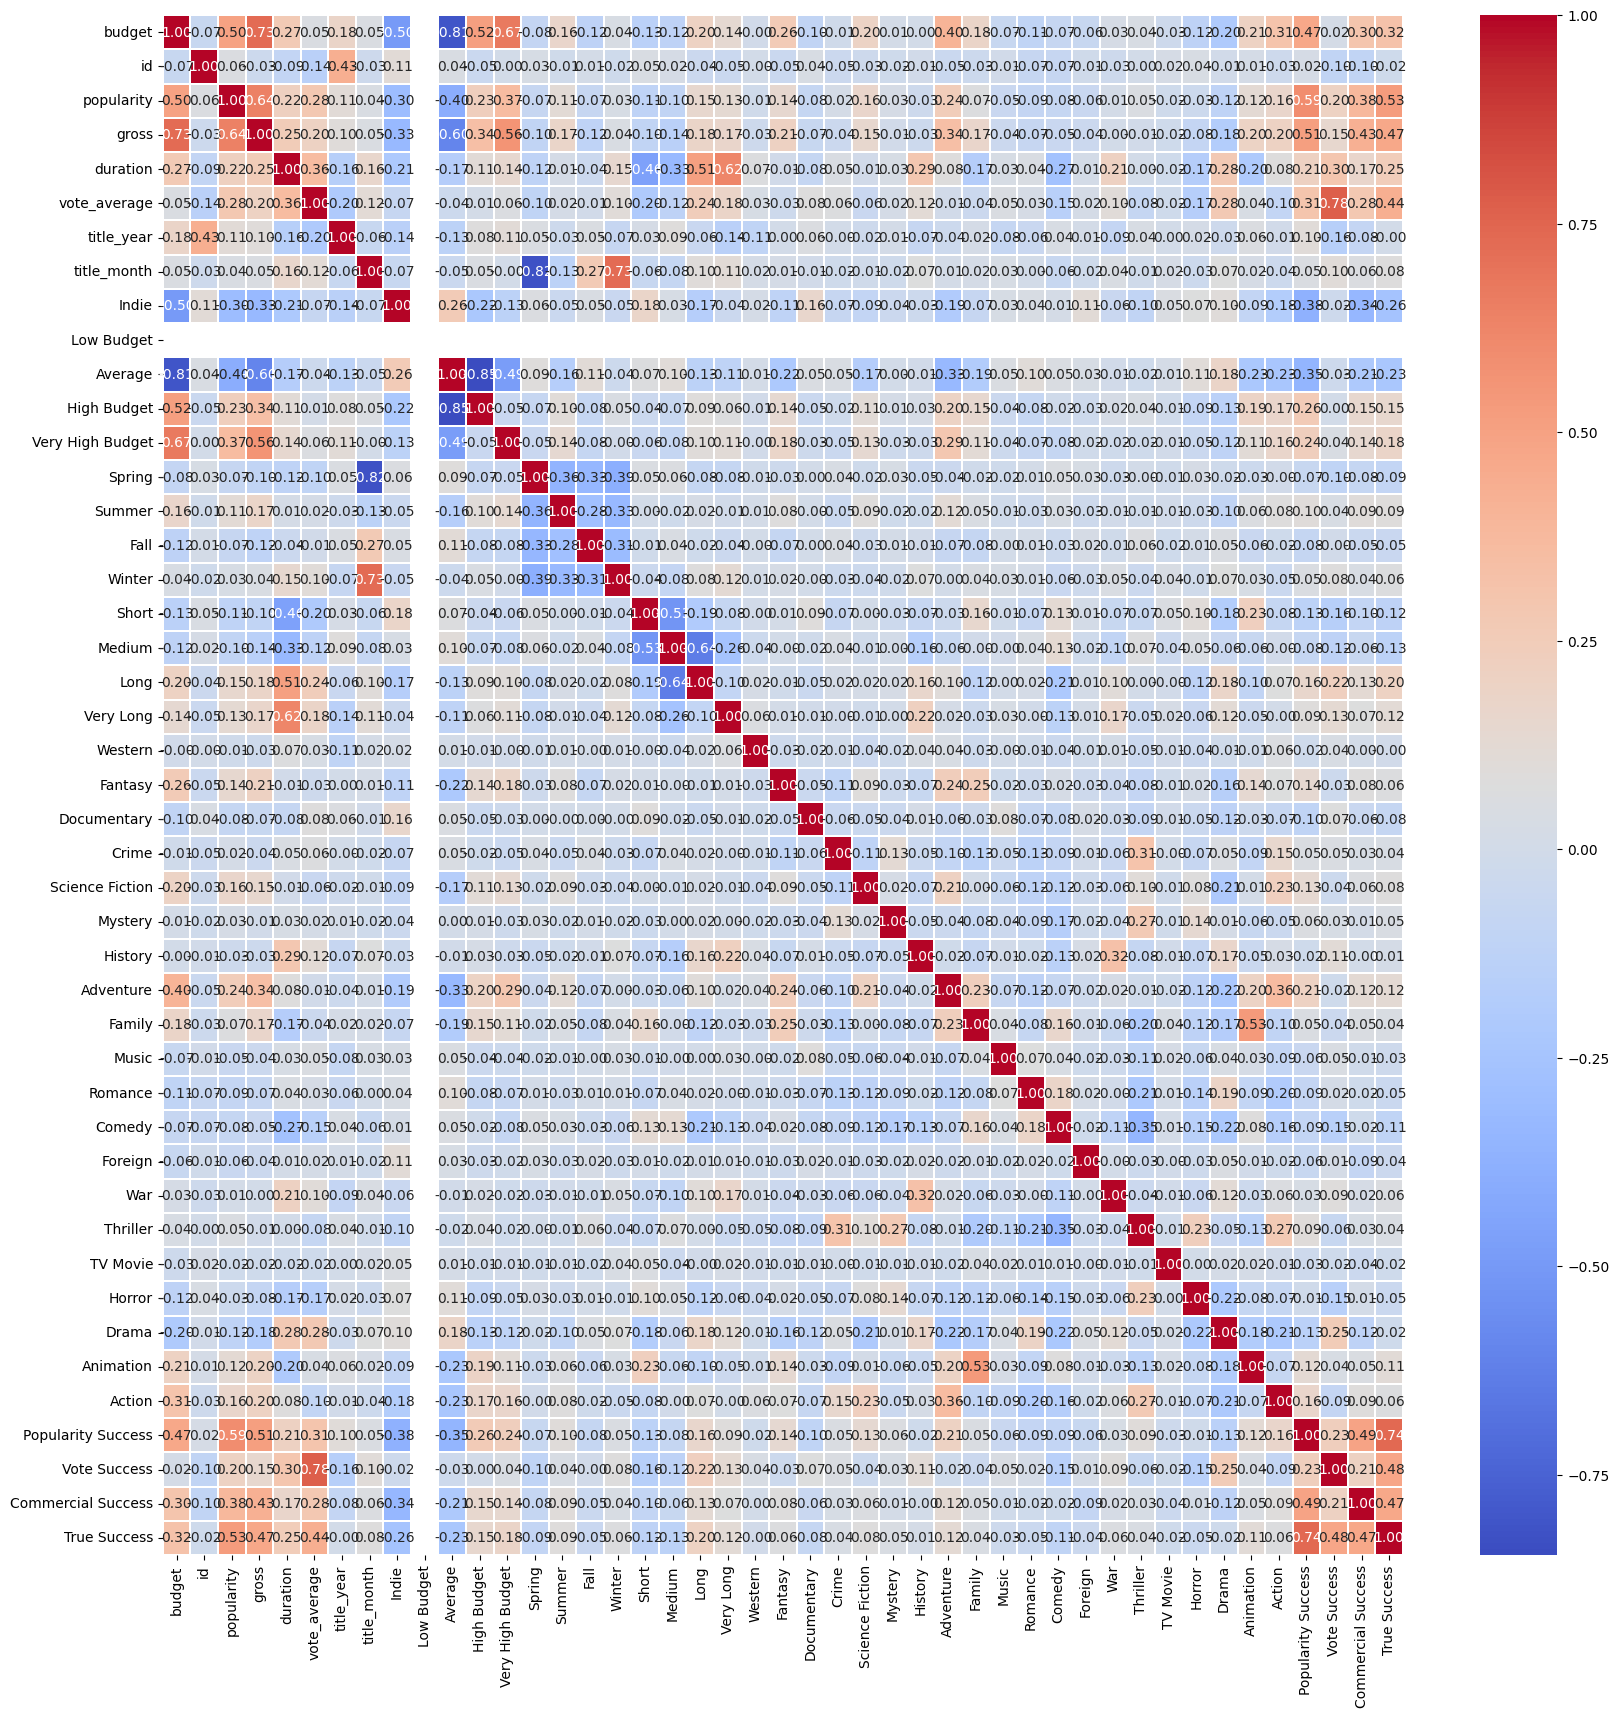

In [ ]:
#correlation matrix with numerical values
plt.figure(figsize = (20,20))
g = sns.heatmap(popularity_data[list(popularity_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

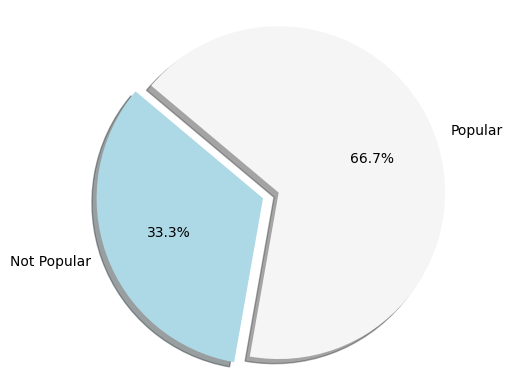

In [ ]:
# Data to plot with Popularity
labels =["Not Popular","Popular"]
sizes = popularity_data['Popularity Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

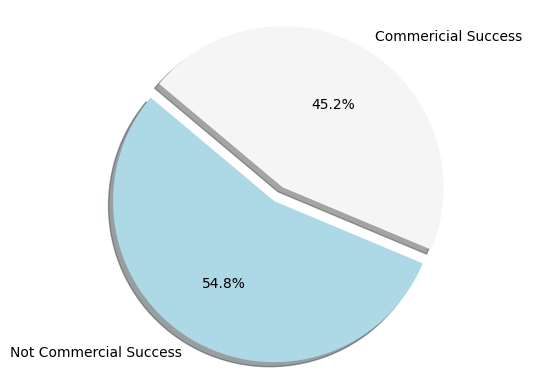

In [ ]:
# Data to plot with Commercial Success
labels =["Not Commercial Success","Commericial Success"]
sizes = popularity_data['Commercial Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

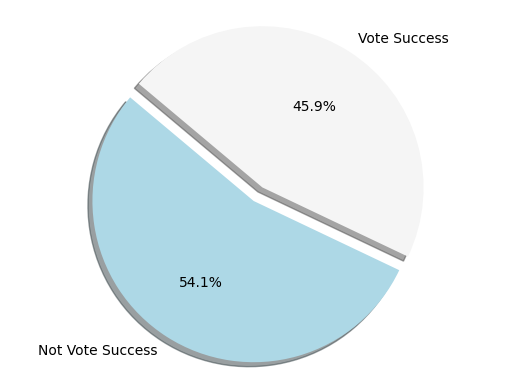

In [ ]:
# Data to plot with Vote Success
labels =["Not Vote Success","Vote Success"]
sizes = popularity_data['Vote Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

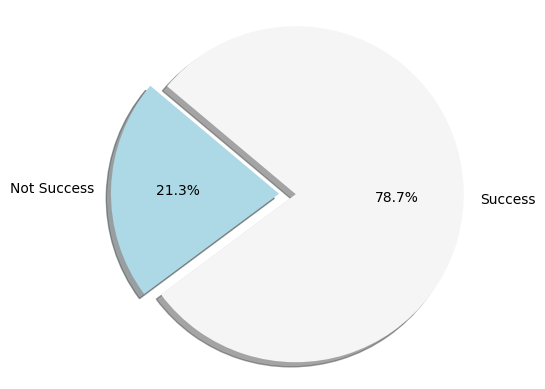

In [ ]:
# Data to plot with Success/ Not Success
labels =["Not Success","Success"]
sizes = popularity_data['True Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

## Dropping irrelevant fields

In [ ]:
# title_year IS dropped atm for testing of months ; duration is dropped
popularity_data.drop(['id','budget','original_title','overview','spoken_languages','production_companies','production_countries','release_date','status',
          'tagline','movie_title','vote_average','language','director_name','actor_1_name','actor_2_name','actor_3_name',
          'companies_1','companies_2','companies_3','country','genres','plot_keywords','popularity','gross', 'title_month', 'duration', 'title_year'], axis=1, inplace=True)
popularity_data.columns

Index(['Indie', 'Low Budget', 'Average', 'High Budget', 'Very High Budget',
       'Spring', 'Summer', 'Fall', 'Winter', 'Short', 'Medium', 'Long',
       'Very Long', 'Western', 'Fantasy', 'Documentary', 'Crime',
       'Science Fiction', 'Mystery', 'History', 'Adventure', 'Family', 'Music',
       'Romance', 'Comedy', 'Foreign', 'War', 'Thriller', 'TV Movie', 'Horror',
       'Drama', 'Animation', 'Action', 'Popularity Success', 'Vote Success',
       'Commercial Success', 'True Success'],
      dtype='object')

In [ ]:
# when running aggregate/success dropping the other success metics
popularity_data.drop(['Popularity Success', 'Vote Success', 'Commercial Success'], axis=1, inplace=True)

In [ ]:
popularity_data

Indie  Low Budget  Average  High Budget  Very High Budget  Spring  \
0         0           0        0            0                 1       0   
1         0           0        0            0                 1       0   
2         0           0        0            0                 1       0   
3         0           0        0            0                 1       0   
4         0           0        0            0                 1       1   
...     ...         ...      ...          ...               ...     ...   
4798      1           0        1            0                 0       0   
4799      1           0        1            0                 0       0   
4800      1           0        1            0                 0       0   
4801      1           0        1            0                 0       0   
4802      1           0        1            0                 0       0   

      Summer  Fall  Winter  Short  ...  Comedy  Foreign  War  Thriller  \
0          0     0       1      0  ...       0        0    0         0   
1          1     0       0      0  ...       0        0    0         0   
2          0     0       1      0  ...       0        0    0         0   
3          1     0       0      0  ...       0        0    0         1   
4          0     0       0      0  ...       0        0    0         0   
...      ...   ...     ...    ...  ...     ...      ...  ...       ...   
4798       0     1       0      1  ...       0        0    0         1   
4799       0     0       1      1  ...       1        0    0         0   
4800       0     0       1      0  ...       1        0    0         0   
4801       1     0       0      0  ...       0        0    0         0   
4802       0     1       0      0  ...       0        0    0         0   

      TV Movie  Horror  Drama  Animation  Action  True Success  
0            0       0      0          0       1             1  
1            0       0      0          0       1             1  
2            0       0      0          0       1             1  
3            0       0      1          0       1             1  
4            0       0      0          0       1             0  
...        ...     ...    ...        ...     ...           ...  
4798         0       0      0          0       1             0  
4799         0       0      0          0       0             0  
4800         1       0      1          0       0             0  
4801         0       0      0          0       0             0  
4802         0       0      0          0       0             0  

[4716 rows x 34 columns]

# Decision Tree Model

In [ ]:
#
popularity_data['is_train'] = np.random.uniform(0, 1, len(popularity_data)) <= .75


In [ ]:
# Train Test the popularity data
train, test = popularity_data[popularity_data['is_train']==True], popularity_data[popularity_data['is_train']==False]
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

y_train = train["True Success"]
X_train = train.drop(labels = ["True Success"],axis = 1)

y_test = test["True Success"]
X_test = test.drop(labels = ["True Success"],axis = 1)


<ipython-input-110-5704c8e648ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['is_train'], axis=1, inplace=True)
<ipython-input-110-5704c8e648ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['is_train'], axis=1, inplace=True)


In [ ]:
# Checking the  number of the train
print(len(train))


3531


In [ ]:
# Checking the  number of the test
print(len(test))

1185


In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
# Decision Tree - Cross Validation Score
cross_val_dtc = cross_val_score(dtc, X_train, y_train, cv=10)
cross_val_dtc.mean()

0.7562474992397689

In [ ]:
# predicting the probability
result = dtc.predict_proba(X_test)[:]
test_result = np.asarray(y_test)

dtcResults = pd.DataFrame(result[:,1])
dtcResults['Predict'] = dtcResults[0].map(lambda s: 1 if s >= 0.5  else 0)
dtcResults['testAnswer'] = pd.DataFrame(test_result)

dtcResults['Correct'] = np.where((dtcResults['Predict'] == dtcResults['testAnswer']), 1, 0)
dtcResults.head()

0  Predict  testAnswer  Correct
0  1.000000        1           1        1
1  0.689655        1           0        0
2  0.689655        1           0        0
3  0.928571        1           1        1
4  0.689655        1           1        1

In [ ]:
# Confusion Matrix
dtc_confusion = confusion_matrix(dtcResults['Predict'], dtcResults['testAnswer'])
print(dtc_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[860 186]
 [ 64  75]]


<Axes: >

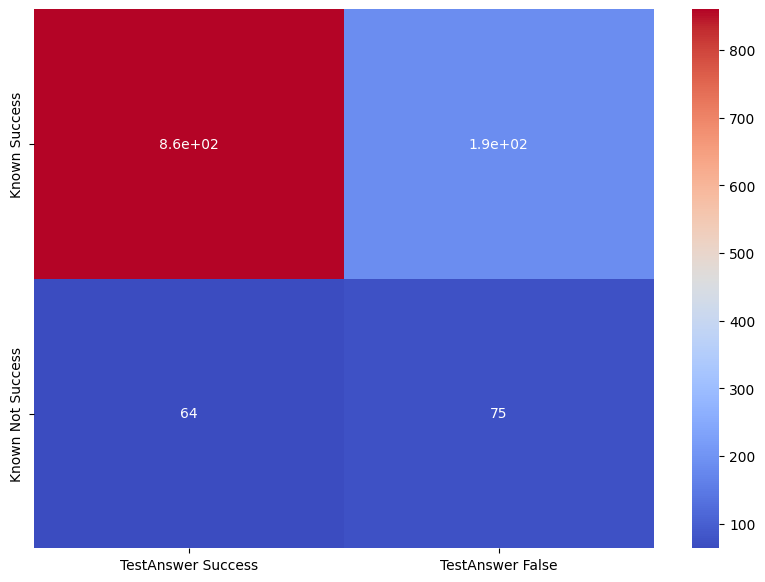

In [ ]:
# Confusion Matrix Plot
con_dec = pd.DataFrame(dtc_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [ ]:
#test Data set - score
dtcResults['Correct'].mean()

0.7890295358649789

# Random Forest Model

In [ ]:
# Fit the Random forest tree model
randofor = RandomForestClassifier(max_depth=7)
randofor.fit(X_train, y_train)


RandomForestClassifier(max_depth=7)

In [ ]:
#Random Forest - cross validation score
cross_val_randofor =  cross_val_score(randofor, X_train, y_train, cv=10)
cross_val_randofor.mean()

0.7537011251420431

In [ ]:
# Prediction dataframe
result = randofor.predict_proba(X_test)[:]
randoforResults = pd.DataFrame(result[:,1])
randoforResults['Predict'] = randoforResults[0].map(lambda s: 1 if s >= 0.5  else 0)
randoforResults['testAnswer'] = pd.DataFrame(test_result)

randoforResults['Correct'] = np.where((randoforResults['Predict'] == randoforResults['testAnswer'])
                     , 1, 0)
randoforResults.head()

0  Predict  testAnswer  Correct
0  0.666415        1           1        1
1  0.683714        1           0        0
2  0.648524        1           0        0
3  0.633665        1           1        1
4  0.619989        1           1        1

In [ ]:
# Confusion Matrix for Random Forest
randofor_confusion = confusion_matrix(randoforResults['Predict'], randoforResults['testAnswer'])
print(randofor_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[907 223]
 [ 17  38]]


<Axes: >

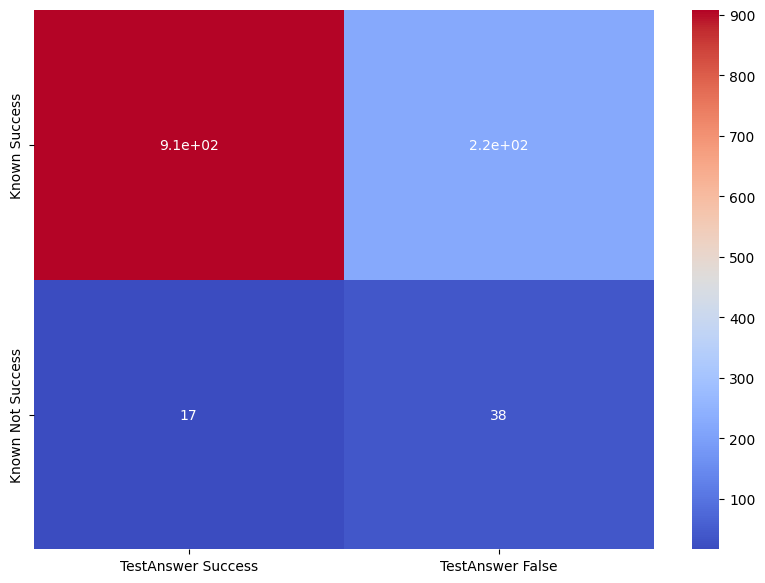

In [ ]:
# Confusion Matrix Plot
con_dec = pd.DataFrame(randofor_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [ ]:
# random forest mean
randoforResults['Correct'].mean()

0.7974683544303798

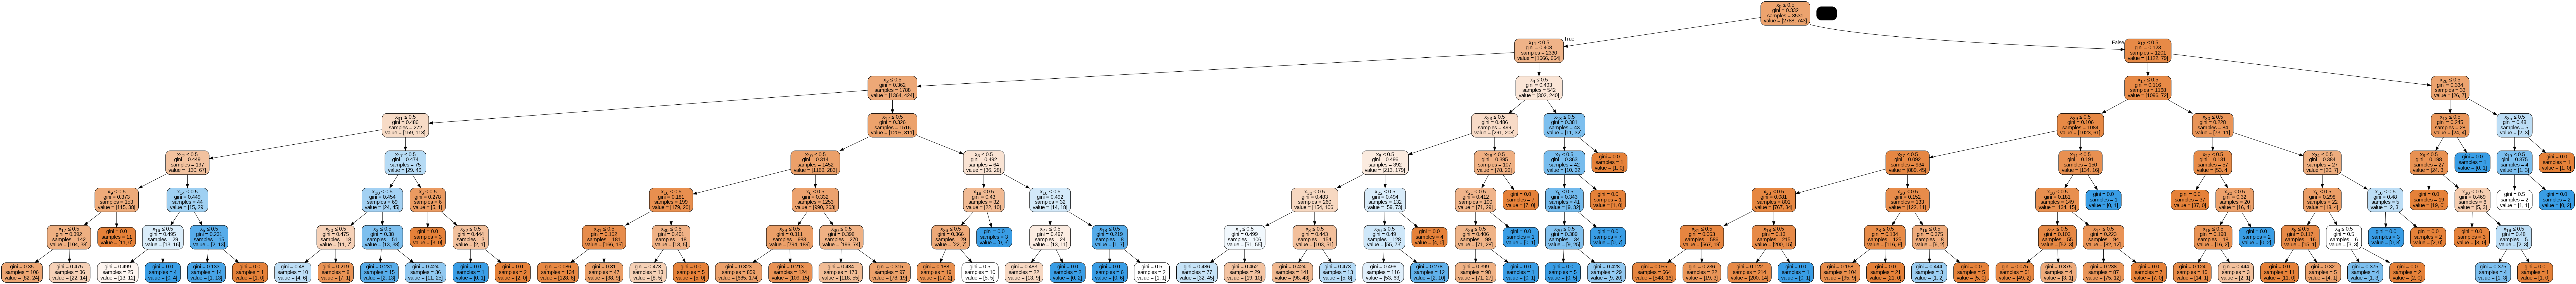

In [ ]:
# RandomForest

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# K-Nearest Neighbor Model

In [ ]:
#k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=100) #can play around with this (neighbors)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=100)

In [ ]:
# knn mean
cross_val_knn = cross_val_score(knn, X_train, y_train, cv=10)
cross_val_knn.mean()

0.7844928858372945

In [ ]:
# Prediction Dataframe
result = knn.predict_proba(X_test)[:]
knnResults = pd.DataFrame(result[:,1])
knnResults['Predict'] = knnResults[0].map(lambda s: 1 if s >= 0.5  else 0)
knnResults['testAnswer'] = pd.DataFrame(test_result)

knnResults['Correct'] = np.where((knnResults['Predict'] == knnResults['testAnswer'])
                     , 1, 0)
knnResults.head()

0  Predict  testAnswer  Correct
0  0.61        1           1        1
1  0.50        1           0        0
2  0.58        1           0        0
3  0.47        0           1        0
4  0.62        1           1        1

In [ ]:
# knn Confusion Matrix
knn_confusion = confusion_matrix(knnResults['Predict'], knnResults['testAnswer'])
print(knn_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[915 238]
 [  9  23]]


<Axes: >

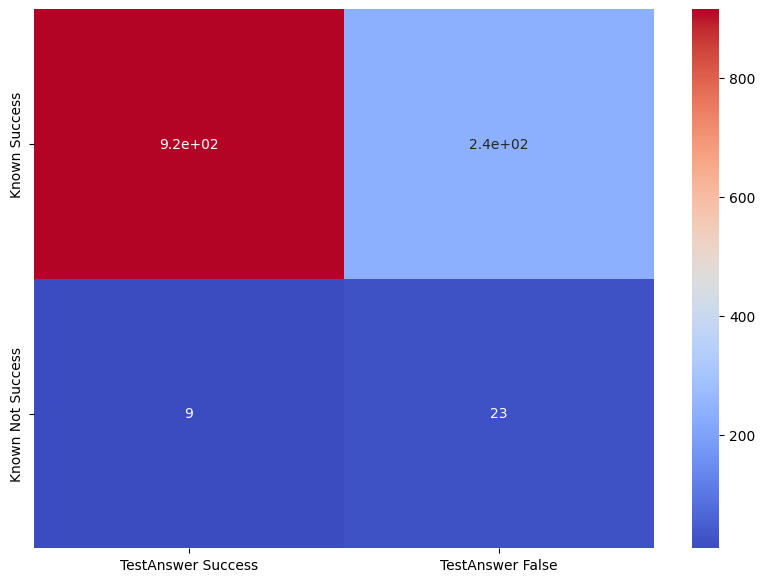

In [ ]:
# knn Confusion Matrix Plot
con_dec = pd.DataFrame(knn_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [ ]:
# knn mean
knnResults['Correct'].mean()

0.7915611814345992

# Suppor Vector Machine Model (SVM)

In [ ]:
# Applying SVM model
svm = svm.SVC(kernel='linear', gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# svm mean
cross_val_svm = cross_val_score(svm, X_train, y_train, cv=10)
cross_val_svm.mean()

0.7548342696179638

In [ ]:
#trying to get svm to work??
result = svm.predict_proba(X_test)
svmResults = pd.DataFrame(result[:,1])
svmResults['Predict'] = svmResults[0].map(lambda s: 1 if s >= 0.5  else 0)
svmResults['testAnswer'] = pd.DataFrame(test_result)
svmResults['Correct'] = np.where((svmResults['Predict'] == svmResults['testAnswer'])
                     , 1, 0)
svmResults


0  Predict  testAnswer  Correct
0     0.623221        1           1        1
1     0.623207        1           0        0
2     0.623182        1           0        0
3     0.623198        1           1        1
4     0.623207        1           1        1
...        ...      ...         ...      ...
1180  0.197105        0           0        1
1181  0.197090        0           0        1
1182  0.197108        0           0        1
1183  0.197069        0           0        1
1184  0.197018        0           0        1

[1185 rows x 4 columns]

In [ ]:
# svm confusion matrix
svm_confusion = confusion_matrix(svmResults['Predict'], svmResults['testAnswer'])
print(svm_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[914 238]
 [ 10  23]]


<Axes: >

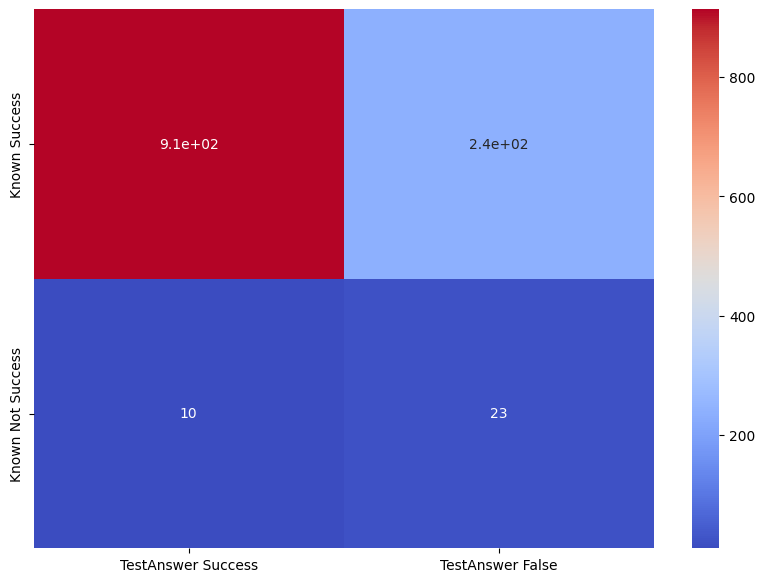

In [ ]:
# svm confusion matrix plot
con_dec = pd.DataFrame(svm_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [ ]:
# svm mean
svmResults['Correct'].mean()

0.790717299578059

# Feature Importance Decision Tree & Random Forest

In [ ]:
# Decision Tree Feature Importance
#decision tree
dtcFeatures = pd.DataFrame(dtc.feature_importances_)
dtcFeatures["name"] = list(X_train)
dtcFeatures.sort_values(by=0, ascending=False).head()

0       name
0   0.278286      Indie
11  0.134446       Long
2   0.074537    Average
12  0.073806  Very Long
10  0.037481     Medium

Text(0.5, 1.0, 'Decision Tree Feature Weight')

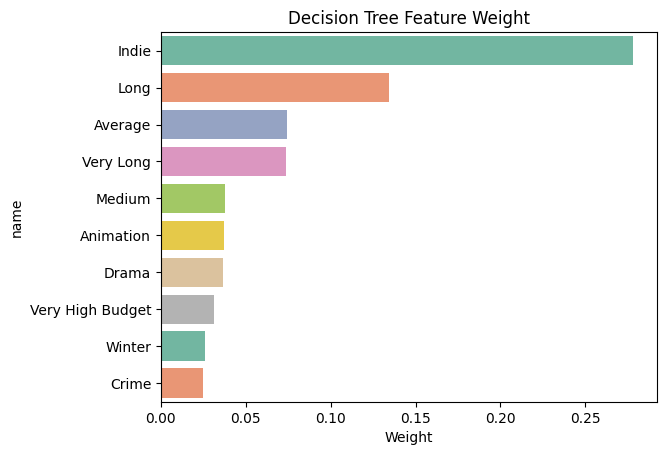

In [ ]:
# Decision Tree Feature Importance Visualization
# g = sns.barplot(0,"name",data = dtcFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
# g.set_xlabel("Weight")
# g = g.set_title("Decision Tree")

# Decision Tree Feature Importance Visualization
g = sns.barplot(x=0, y="name", data=dtcFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2", orient="h")
g.set_xlabel("Weight")
g.set_title("Decision Tree Feature Weight")


In [ ]:
#Random Forest Feature Importance
#random forest
randoforFeatures = pd.DataFrame(randofor.feature_importances_)
randoforFeatures["name"] = list(X_train)
randoforFeatures.sort_values(by=0, ascending=False).head()

0              name
0   0.177204             Indie
11  0.110448              Long
2   0.085818           Average
4   0.071063  Very High Budget
10  0.053611            Medium

Text(0.5, 1.0, 'Random Forest Feature Weight')

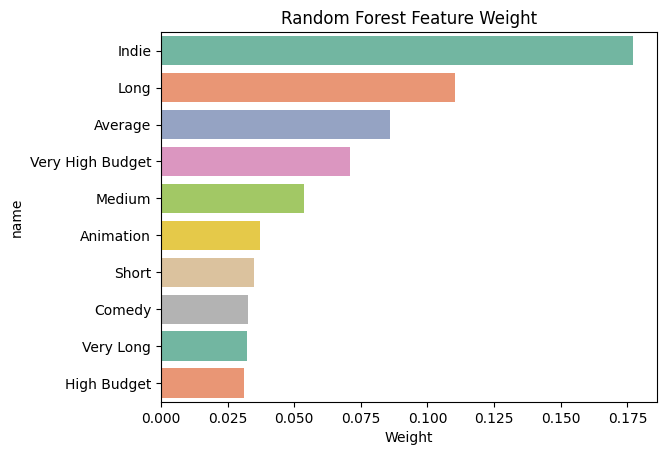

In [ ]:
# Random Forest Feature Importance VIsualization
# g = sns.barplot(0,"name",data = randoforFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
# g.set_xlabel("Weight")
# g = g.set_title("Random Forest")

# Random Forest Feature Importance Visualization
g = sns.barplot(x=0, y="name", data=randoforFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2", orient="h")
g.set_xlabel("Weight")
g.set_title("Random Forest Feature Weight")
